In [ ]:
#!pip install -U matplotlib --user
#!python -m pip install -U pip
#!pip install -U matplotlib
#!pip install matplotlib --force-reinstall --user
#!pip install matplotlib --force-reinstall 

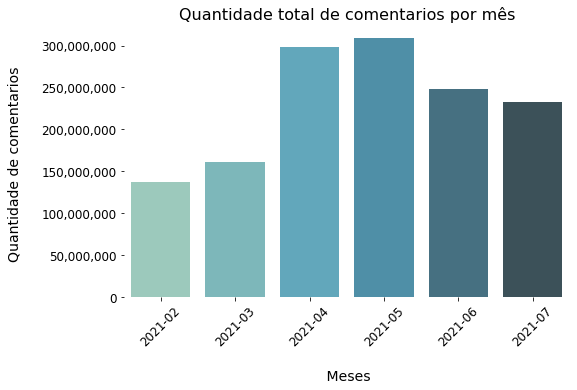

In [1]:
import warnings
warnings.filterwarnings("ignore")
# Biblioteca para manipulação de dados
import pandas as pd
# Biblioteca para criação de graficos 
import matplotlib.pyplot as plt
import seaborn as sns
# Lendo os dados
df = pd.read_csv('C:\\Users\\lucas\\Downloads\\dataset.csv', encoding='utf-8')
# Renomeando as colunas
df.columns = ['data','top_100_mais_vendidos','nome_produto','nota_clientes','numero_comentario_cliente','preco_produto']
# Ajuste de dados removendo caracteres desnecessários
df.numero_comentario_cliente.replace(',', '',regex=True, inplace = True)
df.numero_comentario_cliente.replace('No customer reviews yet','0', inplace = True)
# Conversão de tipos 
df.numero_comentario_cliente = df.numero_comentario_cliente.astype('int64')
# Criando váriavel
qtd_comentarios = df[['data', 'numero_comentario_cliente']]
# Separando ano e mês
for i in range(0, len(qtd_comentarios['data'])):
    qtd_comentarios['data'].iloc[i] = qtd_comentarios['data'].iloc[i][:7]
# Somando comentários de clientes
qtd_comentarios = qtd_comentarios.groupby(['data']).sum()
qtd_comentarios = qtd_comentarios.reset_index()
# Gerando gráfico
# Tamanho do gráfico 
plt.figure(figsize = (8,5))
# Criação das barras
sns.barplot(x = 'data', y = 'numero_comentario_cliente', data = qtd_comentarios, palette = "GnBu_d")
plt.box(False)
# Inserindo título do gráfico 
plt.title('Quantidade total de comentarios por mês', fontsize = 16)
# Inserindo Label no eixo X
plt.xlabel('\n Meses', fontsize = 14)
# Inserindo label no eixo Y
plt.ylabel('Quantidade de comentarios \n', fontsize = 14)
# Ajustando tamanho das fontes
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
# Alterando a rotação da legenda do eixo X
plt.xticks(rotation=45)
# Mostrando gráfico
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()